<a id='1'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Introduction</b>

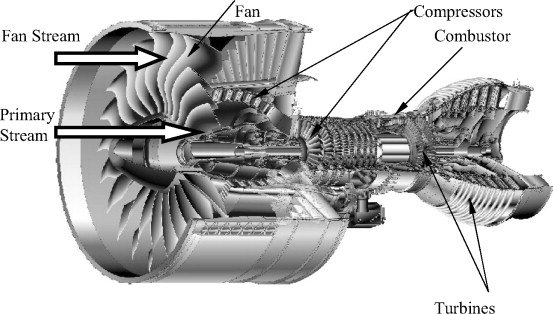

Description
Prognostics and health management is an important topic in industry for predicting state of assets to avoid downtime and failures. This data set is the Kaggle version of the very well known public data set for asset degradation modeling from NASA. It includes Run-to-Failure simulated data from turbo fan jet engines.

Engine degradation simulation was carried out using C-MAPSS. Four different were sets simulated under different combinations of operational conditions and fault modes. Records several sensor channels to characterize fault evolution. The data set was provided by the Prognostics CoE at NASA Ames.

Prediction Goal
In this dataset the goal is to predict the remaining useful life (RUL) of each engine in the test dataset. RUL is equivalent of number of flights remained for the engine after the last datapoint in the test dataset.

Experimental Scenario
Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:
1) unit number

2) time, in cycles

3) operational setting 1

4) operational setting 2

5) operational setting 3

6) sensor measurement 1

7) sensor measurement 2

…

26) sensor measurement 26


Data Set Organization

**Data Set: FD001**
 - Train trjectories: 100
 - Test trajectories: 100
 - Conditions: ONE (Sea Level)
 - Fault Modes: ONE (HPC Degradation)

**Data Set: FD002**
 - Train trjectories: 260
 - Test trajectories: 259
 - Conditions: SIX
 - Fault Modes: ONE (HPC Degradation)

**Data Set: FD003**
 - Train trjectories: 100
 - Test trajectories: 100
 - Conditions: ONE (Sea Level)
 - Fault Modes: TWO (HPC Degradation, Fan Degradation)

**Data Set: FD004**
 - Train trjectories: 248
 - Test trajectories: 249
 - Conditions: SIX
 - Fault Modes: TWO (HPC Degradation, Fan Degradation)



In [ ]:
# Import the libraries required for exploration and preproccesing
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
 
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [ ]:
# Give names to the features
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names

# df_train = pd.read_csv(('./CMaps/train_FD001.txt'), sep='\s+', header=None, names=col_names)
# df_test = pd.read_csv(('./CMaps/test_FD001.txt'), sep='\s+', header=None, names=col_names)
# df_test_RUL = pd.read_csv(('./CMaps/RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

df_train = pd.read_csv(('/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt'), sep='\s+', header=None, names=col_names)
df_test = pd.read_csv(('/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt'), sep='\s+', header=None, names=col_names)
df_test_RUL = pd.read_csv(('/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

In [ ]:
df_train.head()

In [ ]:
df_test.head()

In [ ]:
df_train.info()

In [ ]:
df_train.describe(include='all').T

In [ ]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

In [ ]:
from pandas_profiling import ProfileReport

The profiling report follows to look for outliers, missing values, and distributions. We can see that the data is imbalanced. 

In [ ]:
%%time
profile = ProfileReport(df_train,
                        title="Predictive Maintenance",
                        dataset={"description": "This profiling report was generated for Carl Kirstein",
                                 "copyright_holder": "Carl Kirstein",
                                 "copyright_year": "2022",
                                },
                        explorative=True,
                       )
profile

sensors with constant values can be dropped as they have no predictive power

In [ ]:
# drop the sensors wiith constant values
sens_const_values = []
for feature in list(setting_names + sensor_names):
    try:
        if df_train[feature].min()==df_train[feature].max():
            sens_const_values.append(feature)
    except:
        pass

print(sens_const_values)
df_train.drop(sens_const_values,axis=1,inplace=True)
df_test.drop(sens_const_values,axis=1,inplace=True)

Drop one of the highly correlated features and keep the other. The threshold for correlation is set at 0.95

In [ ]:
# drop all but one of the highly correlated features
cor_matrix = df_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(corr_features)
df_train.drop(corr_features,axis=1,inplace=True)
df_test.drop(corr_features,axis=1,inplace=True)

The remaining features

In [ ]:
list(df_train)

In [ ]:
df_train.head()

In [ ]:
features = list(df_train.columns)

In [ ]:
# check for missing data
for feature in features:
    print(feature + " - " + str(len(df_train[df_train[feature].isna()])))

Add the RUL as a target feature to the data

In [ ]:
# define the maximum life of each engine, as this could be used to obtain the RUL at each point in time of the engine's life 
df_train_RUL = df_train.groupby(['engine']).agg({'cycle':'max'})
df_train_RUL.rename(columns={'cycle':'life'},inplace=True)
df_train_RUL.head()

In [ ]:
df_train=df_train.merge(df_train_RUL,how='left',on=['engine'])

In [ ]:
df_train['RUL']=df_train['life']-df_train['cycle']
df_train.drop(['life'],axis=1,inplace=True)

# the RUL prediction is only useful nearer to the end of the engine's life, therefore we put an upper limit on the RUL
# this is a bit sneaky, since it supposes that the test set has RULs of less than this value, the closer you are
# to the true value, the more accurate the model will be
df_train['RUL'][df_train['RUL']>125]=125
df_train.head()

plot the sensor outputs for all sensors

In [ ]:
plt.style.use('seaborn-white') 
plt.rcParams['figure.figsize']=8,40 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 0.1
plot_items = list(df_train.columns)[1:-1]
fig,ax = plt.subplots(len(plot_items),sharex=True)
ax[0].invert_xaxis()

engines = list(df_train['engine'].unique())

for engine in engines[10:30]:
    for i,item in enumerate(plot_items):
        f = sns.lineplot(data=df_train[df_train['engine']==engine],x='RUL',y=item,color='steelblue',ax=ax[i],
                        )

Although there are nice trends, the signals are quite noisy, therefore they could be smoothed. It is suprising that the noise carries a lot of information, and smoothing the results reduces the accuracy. The smoothing is therefore not implemented. 

In [ ]:
from scipy import signal
def smooth_function(x,window=15,order=3):
    return signal.savgol_filter(x,window,order)


In [ ]:
# for engine in engines:
#     for item in sensor_names:
#         try:
#             df_train[item][df_train['engine']==engine]=smooth_function(df_train[item][df_train['engine']==engine])
#             df_test[item][df_test['engine']==engine]=smooth_function(df_test[item][df_test['engine']==engine])
#         except:
#             pass

In [ ]:
# plt.style.use('seaborn-white') 
# plt.rcParams['figure.figsize']=8,40 
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.size'] = 8
# plt.rcParams['lines.linewidth'] = 0.1
# plot_items = list(df_train.columns)[1:-1]
# fig,ax = plt.subplots(len(plot_items),sharex=True)
# ax[0].invert_xaxis()
# for engine in engines:
#     for i,item in enumerate(plot_items):
#         f = sns.lineplot(data=df_train[df_train['engine']==engine],x='RUL',y=item,color='steelblue',ax=ax[i],
#                         )

<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Pre-processing and Feature Selection</b>

Perform a statistical univariate test to determine the best features.

In [ ]:
# awesome bit of code from https://www.kaggle.com/code/adibouayjan/house-price-step-by-step-modeling

Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
X = df_train.iloc[:,1:-1]
y = df_train.iloc[:,-1]
backward_regression(X, y)

In [ ]:
Selected_Features

In [ ]:
# X.head()
feature_names = Selected_Features[0]
np.shape(X)

In [ ]:
len(feature_names)

<a id='4'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Modelling and Evaluation</b>

In [ ]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [ ]:
df_test_cycle = df_test.groupby(['engine']).agg({'cycle':'max'})
df_test_cycle.rename(columns={'cycle':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['engine'])
df_test_max = df_test_max[(df_test_max['cycle']==df_test_max['life'])]
df_test_max.drop(['life'],axis=1,inplace=True)
# df_test_max

In [ ]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
X_train.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>kNN</b>

In [ ]:
%%time
from sklearn.neighbors import KNeighborsRegressor
start = time.time()
model = KNeighborsRegressor(n_neighbors=9).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()



model_performance.loc['kNN'] = [model.score(X_test,y_test), 
                                   mean_squared_error(y_test,y_predictions,squared=False),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False)))

In [ ]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False))),
             xy=(0,150),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

In [ ]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=20,5 

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_predictions,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

<a id='4_2'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>SVM</b>

In [ ]:
%%time
from sklearn.svm import SVR
start = time.time()
model = SVR(kernel="rbf", C=100, gamma=0.5, epsilon=0.01).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

model_performance.loc['SVM'] = [model.score(X_test,y_test), 
                                   mean_squared_error(y_test,y_predictions,squared=False),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False)))

In [ ]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False))),
             xy=(0,150),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

In [ ]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=20,5 

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_predictions,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Random Forest</b>

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=500,
                              min_samples_leaf=1,
                              max_features='sqrt',
                             ).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

model_performance.loc['Random Forest'] = [model.score(X_test,y_test), 
                                   mean_squared_error(y_test,y_predictions,squared=False),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False)))

In [ ]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=5,5 

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False))),
             xy=(0,150),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

In [ ]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=20,5 

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_predictions,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

In [ ]:
from sklearn.model_selection import train_test_split

X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train, test_size=0.1)

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_reshaped = X_train_s.reshape(X_train_s.shape[0], 1, X_train_s.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
%%time

start = time.time()
history = model.fit(x=X_train_reshaped,y=y_train_s,
                    validation_data = (X_val_reshaped,y_val),
                    epochs = 30,
                    # shuffle = True,
                    batch_size = 500,
                    callbacks=[reduce_lr]
                   )
end_train = time.time()
y_predictions = model.predict(X_test_reshaped) # These are the predictions from the test data.
end_predict = time.time()
y_predictions = y_predictions[:,0][:,0]
model_performance.loc['LSTM'] = [sklearn.metrics.r2_score(y_test, y_predictions), 
                                   mean_squared_error(y_test,y_predictions,squared=False),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False)))

In [ ]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=5,5 

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False))),
             xy=(0,150),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

In [ ]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=20,5 

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_predictions,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()


In [ ]:
plt.style.use('seaborn-white') 
plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 1.5
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model_performance.style.background_gradient(cmap='RdYlBu_r').format({'R2': '{:.2%}',
                                                                     'RMSE': '{:.2f}',
                                                                     'time to train':'{:.3f}',
                                                                     'time to predict':'{:.3f}',
                                                                     'total time':'{:.3f}',
                                                                     })

The models do not seem that accurate, but the remaining useful life (RUL) when less than 50 gets predicted far more accurately. 

Surprisingly the models are more accurate when the data is not smoothed. It seems that the noisyness of the sensors does carry enough information for the predictions to remain accurate.  

A pity of the modelling is that the time leading up to the final points in the test data is lost. It carries potentially more information to make the model even more accurate if the timeseries prediction for LSTM is done.

I prefer the kNN and the Random Forest models. 
